# **DNSC6315 Assignments**

We use Capital Bikeshare data for the analysis in DNSC6315 assignments.

### Read data from drive or local

In [17]:
# Reading the file directly from local
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

In [18]:
import pandas as pd
# Read csv files

df_Feb = pd.read_csv('202402-capitalbikeshare-tripdata.csv') # Updated path to read file from local
df_Mar = pd.read_csv('202403-capitalbikeshare-tripdata.csv') # Updated path to read file from local
df_Apr = pd.read_csv('202404-capitalbikeshare-tripdata.csv') # Updated path to read file from local

# concat data
df=pd.concat([df_Feb, df_Mar,df_Apr])

In [19]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


## Focus on GWSB Station: '22nd & H St NW'

### Bike Availability: Number of Pickups

In [20]:
# Convert the 'started_at' column to datetime objects
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date

# Filter for trips started at '22nd & H St NW'
PU_trips = df[df['start_station_name'] == '22nd & H St NW']

# Group by date and count the trips
PU_counts = PU_trips.groupby('started_at_date')['started_at_date'].count()

PU_counts

started_at_date
2024-02-01    33
2024-02-02    23
2024-02-03    22
2024-02-04    18
2024-02-05    19
              ..
2024-04-26    33
2024-04-27    18
2024-04-28    36
2024-04-29    37
2024-04-30    40
Name: started_at_date, Length: 90, dtype: int64

## Dock Availability: Number of Dropoffs

In [21]:
# Convert the 'ended_at' column to datetime objects
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

# Filter for trips ended at '22nd & H St NW'
DO_trips = df[df['end_station_name'] == '22nd & H St NW']

# Group by date and count the trips
DO_counts = DO_trips.groupby('ended_at_date')['ended_at_date'].count()

DO_counts

ended_at_date
2024-02-01    33
2024-02-02    25
2024-02-03    20
2024-02-04    19
2024-02-05    23
              ..
2024-04-26    39
2024-04-27    24
2024-04-28    28
2024-04-29    38
2024-04-30    39
Name: ended_at_date, Length: 90, dtype: int64

## Merge PU and DO tables
- For each day, we look at the numbers of pickups and dropoffs

In [22]:
# merge PU_counts and DO_counts by matching the dates, and change the column names to PU_count and DO_count respectively.

PU_DO_counts = pd.merge(PU_counts, DO_counts, left_index=True, right_index=True, how='outer')
PU_DO_counts = PU_DO_counts.rename(columns={'started_at_date': 'PU_ct', 'ended_at_date': 'DO_ct'})

# change the index name from 'started_at' to 'date'

PU_DO_counts = PU_DO_counts.rename_axis('date')
PU_DO_counts


,PU_ct,DO_ct
date,,
2024-02-01,33,33
2024-02-02,23,25
2024-02-03,22,20
2024-02-04,18,19
2024-02-05,19,23
...,...,...
2024-04-26,33,39
2024-04-27,18,24
2024-04-28,36,28


# Feature Information: Weather Data
- From https://www.visualcrossing.com/weather-history/

In [23]:
df_weather = pd.read_csv('DC_weather_2024.csv')

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2024-01-01,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,...,0.9,1,10,2024-01-01T07:26:50,2024-01-01T16:56:30,0.68,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
1,"washington, dc",2024-01-02,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,...,8.3,5,10,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
2,"washington, dc",2024-01-03,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,...,9.6,5,10,2024-01-03T07:27:04,2024-01-03T16:58:10,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,D6279,72403793728,KADW,..."
3,"washington, dc",2024-01-04,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,...,4.8,4,10,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,KADW,KDAA,7..."
4,"washington, dc",2024-01-05,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,...,11.6,5,10,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,D6279,KADW,..."


## Drop variables of your choice

In [24]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

## Prepare X and y: Merge df_weather with PU_DO_counts

In [25]:
# Convert the 'datetime' column to datetime objects and extract the date
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather['date'] = df_weather['datetime'].dt.date

# Merge the two dataframes based on the 'date' column
merged_df = pd.merge(PU_DO_counts, df_weather, on='date', how='left')

# Prepare training and test data

In [26]:
# we have two target variables: PU_ct and DO_ct
y = merged_df[['PU_ct','DO_ct']]
X = merged_df[['temp','precip','windspeed','uvindex','icon']]
X

,temp,precip,windspeed,uvindex,icon
0,42.4,0.000,12.0,5,partly-cloudy-day
1,47.1,0.012,19.1,2,rain
2,42.2,0.000,14.7,6,clear-day
3,41.7,0.000,9.2,6,clear-day
4,41.0,0.000,12.2,6,partly-cloudy-day
...,...,...,...,...,...
85,55.2,0.000,15.4,9,partly-cloudy-day
86,55.7,0.032,10.0,2,rain
87,67.0,0.000,10.0,9,partly-cloudy-day
88,75.2,0.000,13.0,9,partly-cloudy-day


## <font color="red"> Important: train_test_split with y=['PU_ct','DO_ct']. Why? <font>

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200) # 40% test data

# **Assignment 1: Classification Tree and Performance Evaluation**

### As we discussed in class, our intuition is to allocate more bikes if PU_ct > DO_ct; and less bikes if PU_ct < DO_ct. Thus, in this assignment, we want to predict whether PU_ct > DO_ct. We first create a new target variable to indicate whether PU_ct > DO_ct.

## <font color="red"> Additional Preprocessing Steps <font>

### Create categorical target variable 'Which_High' with classes {'PU_High','DO_High'}

In [28]:
# create a new variable to indicate if PU_ct > DO_ct in y_train and y_test
# create 'Which_High' with classes in string for plot_tree

y_train['PU_gt_DO'] = y_train['PU_ct'] > y_train['DO_ct']
y_train['Which_High'] = y_train['PU_gt_DO'].map({True: 'PU_High', False: 'DO_High'})

y_test['PU_gt_DO'] = y_test['PU_ct'] > y_test['DO_ct']
y_test['Which_High']=y_test['PU_gt_DO'].map({True: 'PU_High', False: 'DO_High'})


### Dummy encoding of categorical feature 'icon' before training

In [29]:
# get dummies in X_train_PU
X_train = pd.get_dummies(X_train, columns=['icon'], prefix='icon',drop_first=True)
# get dummies in X_test_PU
X_test = pd.get_dummies(X_test, columns=['icon'], prefix='icon',drop_first=True)

# Ensure both training and testing sets have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [30]:
X_train.head()

,temp,precip,windspeed,uvindex,icon_partly-cloudy-day,icon_rain,icon_snow
73,66.0,0.000,22.5,8,True,False,False
60,53.9,0.235,13.1,4,False,True,False
18,41.1,0.000,11.2,7,False,False,False
44,56.6,0.000,18.8,8,True,False,False
4,41.0,0.000,12.2,6,True,False,False


## <font color="red"> Task 1: </font> Train and visualize a classification tree with max_depth=3 for predicting 'Which_High' using 'entropy' as the criterion. [10 pts]

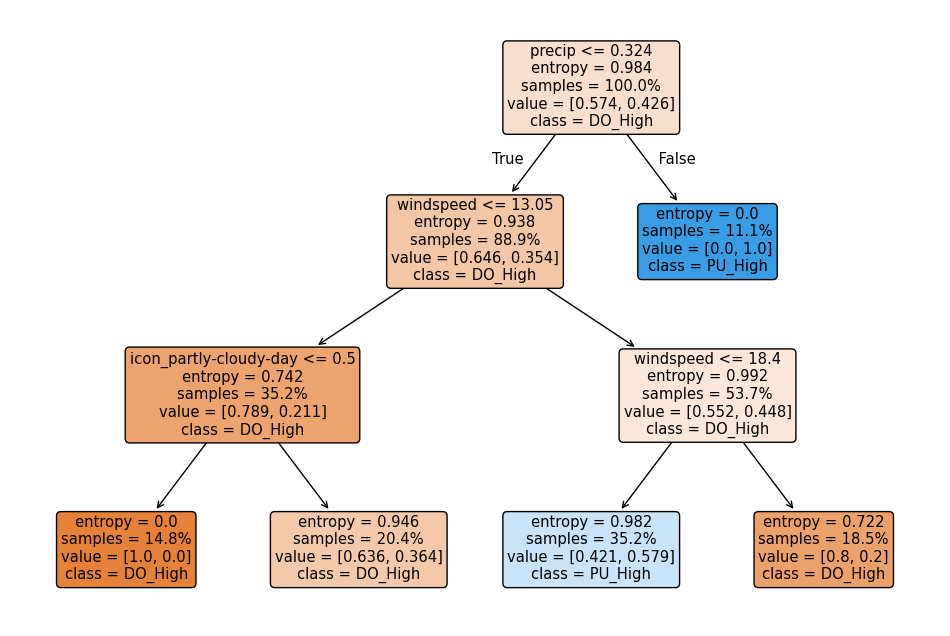

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=0)
clf.fit(X_train, y_train['Which_High'])

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X_train.columns, class_names=['DO_High', 'PU_High'], filled=True, rounded=True, proportion=True)
plt.show()

## <font color="red"> Task 2: </font> Pick the first sample in the test data and report its estimated probability of 'PU_High'. [10pts]

In [33]:
# Get the first sample from the test data
first_sample = X_test.iloc[[0]]

# Predict the probabilities using the trained model
probs = clf.predict_proba(first_sample)

# Find the index of 'PU_High' in the classes
pu_high_index = list(clf.classes_).index('PU_High')

# Extract the probability for 'PU_High'
pu_high_prob = probs[0, pu_high_index]

# Report the probability
print(f"The estimated probability of 'PU_High' for the first sample in the test data is: {pu_high_prob:.4f}")

The estimated probability of 'PU_High' for the first sample in the test data is: 0.2000


## <font color="red"> Task 3: </font> Report the classification tree model's plain accuracy in the test data. [10pts]

In [34]:
from sklearn.metrics import accuracy_score

# Predict the classes for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test['Which_High'], y_pred)

# Report the accuracy
print(f"The plain accuracy of the classification tree model on the test data is: {accuracy:.4f}")

The plain accuracy of the classification tree model on the test data is: 0.5278


## <font color="red"> Task 4: </font> Show the confusion matrix of this classification tree in the test data [10 pts]

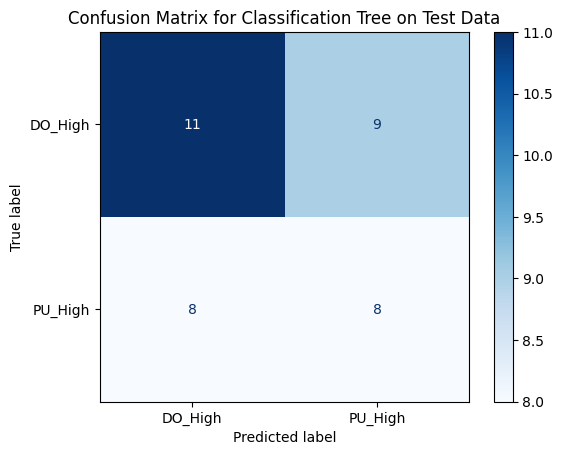

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the classes for the test data
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test['Which_High'], y_pred, labels=clf.classes_)

# Create a display object for the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues')  # Use a blue color scheme for readability
plt.title("Confusion Matrix for Classification Tree on Test Data")
plt.show()

## <font color="red"> Task 5: </font> Suppose we are interested in the class of 'DO_High' (i.e., we call it 'positive'). What are the true positive rate and the false positive rate of this classification tree? [10 pts]

In [36]:
from sklearn.metrics import confusion_matrix

# Predict the classes for the test data
y_pred = clf.predict(X_test)

# Compute the confusion matrix with 'DO_High' as the positive class
# Ensure the order of labels: ['PU_High', 'DO_High'] to match standard convention (negative, positive)
cm = confusion_matrix(y_test['Which_High'], y_pred, labels=['PU_High', 'DO_High'])

# Extract values from the confusion matrix
# For ['PU_High', 'DO_High'] order:
# [[TN, FP],
#  [FN, TP]]
tn, fp = cm[0, 0], cm[0, 1]  # Row 0: True PU_High (negative class)
fn, tp = cm[1, 0], cm[1, 1]  # Row 1: True DO_High (positive class)

# Calculate True Positive Rate (TPR)
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero

# Calculate False Positive Rate (FPR)
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # Avoid division by zero

# Report the results
print(f"True Positive Rate (TPR) with 'DO_High' as positive: {tpr:.4f}")
print(f"False Positive Rate (FPR) with 'DO_High' as positive: {fpr:.4f}")

True Positive Rate (TPR) with 'DO_High' as positive: 0.5500
False Positive Rate (FPR) with 'DO_High' as positive: 0.5000


## <font color="red"> Task 6: </font> Follow the sample code in 'Lec 2 ClassificationPerformance', compare the following methods by AUC evaluated under 5-fold cross-validation. [20 pts]
- Linear SVM, i.e., SVC(kernel = 'linear')
- KNN with K=10
- DecisionTreeClassifier(max_depth=3,criterion = 'entropy', random_state=0)


In [41]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd

# Define the classifiers to compare (as in the sample: list with append)
models = []
models.append(('Linear SVM', SVC(kernel='linear', probability=True, random_state=0)))
models.append(('KNN (k=10)', KNeighborsClassifier(n_neighbors=10)))
models.append(('Decision Tree', DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)))

# Lists to store results (as in the sample)
acc_results = []
auc_results = []
names = []

# Set up a DataFrame to store performance results (as in the sample)
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

# Define 5-fold cross-validation with KFold (similar to sample's 10-fold)
kfold = KFold(n_splits=5)

# Evaluate each model using 5-fold cross-validation (as in the sample)
i = 0
for name, model in models:
    # AUC scoring
    cv_auc_results = cross_val_score(model, X_train, y_train['Which_High'],
                                     cv=kfold, scoring='roc_auc')
# Accuracy scoring
    cv_acc_results = cross_val_score(model, X_train, y_train['Which_High'],
                                     cv=kfold, scoring='accuracy')

    # Store results (as in the sample)
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [
        name,
        round(cv_auc_results.mean() * 100, 2),
        round(cv_auc_results.std() * 100, 2),
        round(cv_acc_results.mean() * 100, 2),
        round(cv_acc_results.std() * 100, 2)
    ]
    i += 1

# Sort results by AUC Mean in descending order (as in the sample)
model_results = model_results.sort_values(by=['AUC Mean'], ascending=False)

# Display the results
print("Comparison of Classifiers by AUC and Accuracy (5-fold Cross-Validation):")
print(model_results)

Comparison of Classifiers by AUC and Accuracy (5-fold Cross-Validation):
       Algorithm  AUC Mean  AUC STD  Accuracy Mean  Accuracy STD
0     Linear SVM     56.35    15.23          54.00         12.11
2  Decision Tree     41.43    15.39          59.45          6.34
1     KNN (k=10)     39.67    11.47          52.00          5.70


## <font color="red"> Task 7: </font> After selecting the best model, report its final out-of-sample performance measured by AUC. [10 pts]

In [46]:
from sklearn.metrics import roc_auc_score

# Function to compute out-of-sample AUC based on model type
def compute_out_of_sample_auc(model, model_name, X_test_data, y_test_labels):
    """
    Compute the out-of-sample AUC for a given model.
    Uses decision_function for SVC and predict_proba for other models.
    """
    if 'Linear SVM' in model_name:
        # For Linear SVM, use decision_function to get raw scores
        scores = model.decision_function(X_test_data)
    else:
        # For other models like KNN or Decision Tree, use predict_proba
        scores = model.predict_proba(X_test_data)[:, 1]  # Probabilities for the positive class
    auc_score = roc_auc_score(y_test_labels, scores)
    return auc_score

# Retrieve the best model name from Task 6 results
top_model_name = model_results.iloc[0]['Algorithm']  # Best model based on AUC Mean

# Convert the models list to a dictionary for lookup
model_dict = dict(models)  # Uses the 'models' list from Task 6

# Select and train the top-performing model on the full training data
selected_model = model_dict[top_model_name]
selected_model.fit(X_train, y_train['Which_High'])

# Compute the out-of-sample AUC on the test set
test_auc_score = compute_out_of_sample_auc(selected_model, top_model_name, X_test, y_test['Which_High'])

# Display the results with additional context
print(f"\nEvaluating Out-of-Sample Performance:")
print(f"Top-Performing Model: {top_model_name}")
print(f"Out-of-Sample AUC: {test_auc_score*100:.2f} (Positive Class: 'PU_High')")


Evaluating Out-of-Sample Performance:
Top-Performing Model: Linear SVM
Out-of-Sample AUC: 38.75 (Positive Class: 'PU_High')
